## Preliminary operations - importing libraries, reading the dataset, initial data normalization and basic data analysis.

In [351]:
# Import needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, svm, ensemble
%matplotlib inline

In [352]:
# Read the entry dataset

employees = pd.read_csv(
	filepath_or_buffer='./employees.csv',
	dtype={
		'Education': 'string',
		'JoiningYear': 'int16',
		'City': 'string',
		'PaymentTier': 'int8',
		'Age': 'int8',
		'Gender': 'string',
		'EverBenched': 'string',
		'ExperienceInCurrentDomain': 'int8',
		'LeaveOrNot': 'int8'
	}
)
employees

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [353]:
# Let's clean things up a bit

normalizedEmployees = pd.get_dummies(employees, columns=['Education', 'City', 'Gender', 'EverBenched'], drop_first=True)

normalizedEmployees


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,0,0,0,0,0,0
4649,2013,2,37,2,1,1,0,0,1,1,0
4650,2018,3,27,5,1,1,0,1,0,1,0
4651,2012,3,30,2,0,0,0,0,0,1,1


In [354]:
# Shape of the dataset

rows, columns = employees.shape
size = employees.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 4653 rows x 9 columns - 41877 elements in total


In [355]:
# Concise summary of the dataset

employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   string
 1   JoiningYear                4653 non-null   int16 
 2   City                       4653 non-null   string
 3   PaymentTier                4653 non-null   int8  
 4   Age                        4653 non-null   int8  
 5   Gender                     4653 non-null   string
 6   EverBenched                4653 non-null   string
 7   ExperienceInCurrentDomain  4653 non-null   int8  
 8   LeaveOrNot                 4653 non-null   int8  
dtypes: int16(1), int8(4), string(4)
memory usage: 172.8 KB


As we can see, there are not any missing values.

In [356]:
# Number of unique values in each column

employees.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [357]:
# Duplicate rows appearing in the dataset

duplicates = employees.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 1889


In [358]:
# Statistical summary of the dataset

normalizedEmployees.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864,0.187621,0.038470,0.248657,0.272512,0.597034,0.102729
std,1.863377,0.561435,4.826087,1.558240,0.475047,0.390451,0.192348,0.432281,0.445300,0.490547,0.303638
min,2012.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data visualisation

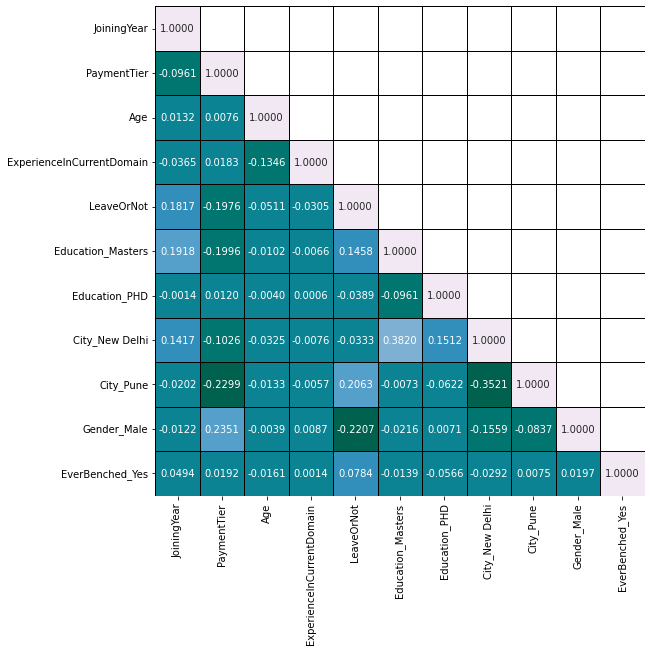

LeaveOrNot                   1.000000
City_Pune                    0.206264
JoiningYear                  0.181705
Education_Masters            0.145801
EverBenched_Yes              0.078438
ExperienceInCurrentDomain   -0.030504
City_New Delhi              -0.033341
Education_PHD               -0.038938
Age                         -0.051126
PaymentTier                 -0.197638
Gender_Male                 -0.220701
Name: LeaveOrNot, dtype: float64

In [359]:
# Correlation matrix

corr = normalizedEmployees.corr()

leaveCorr = corr['LeaveOrNot'].sort_values(ascending=False)

# Cover upper part of the heatmap to make it more readable
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
corr = corr.mask(mask)

fig, ax = plt.subplots(figsize=(9, 9))

cmap = sns.color_palette(
	palette='PuBuGn_r',
	n_colors=10
)

sns.heatmap(
	data=corr,
	cmap=cmap,
	annot=True,
	fmt='.4f',
	linewidths=1,
	linecolor='black',
	cbar=False,
	square=True
)

plt.show()
leaveCorr

As seen above, `LeaveOrNot` correlates the most with `Gender` and `JoiningYear`.

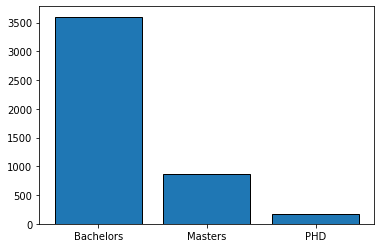

Bachelors represent ~77.39% of all employees.


In [360]:
# Distribution of employees per `Education`

from numpy import percentile


labels, counts = np.unique(
	employees['Education'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topEducationalTitle = labels[np.argmax(counts)]
topPercent = round(counts.max() / len(employees) * 100, 2)

print(f'{topEducationalTitle} represent ~{topPercent}% of all employees.')

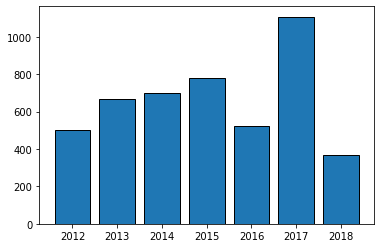

Majority of employees joined in 2017 year.


In [361]:
# Distribution of employees per `JoiningYear`

labels, counts = np.unique(
	employees['JoiningYear'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostOftenAppearingJoiningYear = labels[np.argmax(counts)]

print(f'Majority of employees joined in {mostOftenAppearingJoiningYear} year.')

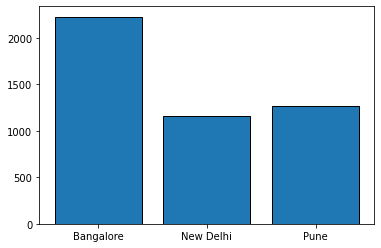

The biggest workforce is based in Bangalore


In [362]:
# Distribution of employees per `City`

labels, counts = np.unique(
	employees['City'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostPopularCity = labels[np.argmax(counts)]

print(f'The biggest workforce is based in {mostPopularCity}')

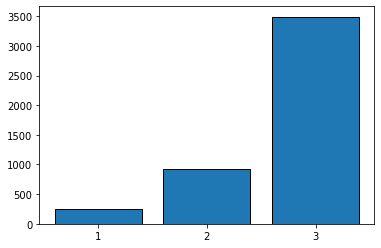

Most of the employees are in the 3rd payment tier.


In [363]:
# Distribution of employees per `PaymentTier`

labels, counts = np.unique(
	employees['PaymentTier'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

paymentTier = labels[np.argmax(counts)]

if paymentTier == 1:
	suffix = 'st'
elif paymentTier == 2:
	suffix = 'nd'
else:
	suffix = 'rd'

print(f'Most of the employees are in the {paymentTier}{suffix} payment tier.')

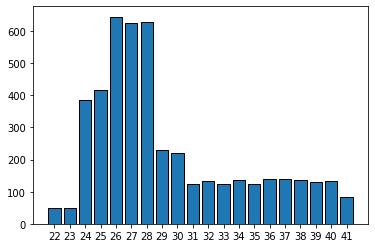

While vast majority of all employees are 24 - 30 years old, greater part of them are 26 - 28 years old.


In [364]:
# Distribution of employees per `Age`

labels, counts = np.unique(
	employees['Age'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

top3Ages = np.argpartition(counts, -3)[-3:]
top3MinAge = labels[top3Ages].min()
top3MaxAge = labels[top3Ages].max()

top7Ages = np.argpartition(counts, -7)[-7:]
top7MinAge = labels[top7Ages].min()
top7MaxAge = labels[top7Ages].max()

print(f'While vast majority of all employees are {top7MinAge} - {top7MaxAge} years old, greater part of them are {top3MinAge} - {top3MaxAge} years old.')

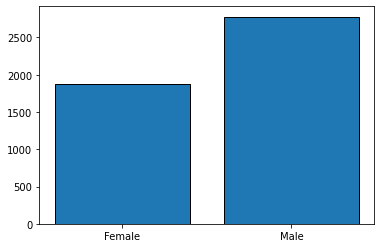

Although "Male" is a dominant gender, the predominance is not very big.


In [365]:
# Distribution of employees per `Gender`

labels, counts = np.unique(
	employees['Gender'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topGender = labels[np.argmax(counts)]

print(f'Although "{topGender}" is a dominant gender, the predominance is not very big.')

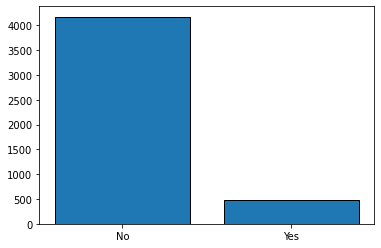

As we can see, most of the personnel has not been benched away from projects for 1 month or longer.


In [366]:
# Distribution of employees per `EverBenched`

labels, counts = np.unique(
	employees['EverBenched'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

everBenched = labels[np.argmax(counts)]

if everBenched == 'No':
	p = 'has not'
else:
	p = 'has'
	
print(f'As we can see, most of the personnel {p} been benched away from projects for 1 month or longer.')


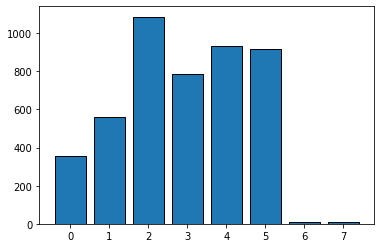

Despite the fact that major part of workers has 2 years of experience, nearly all of the employed has 0 - 5 years.
Employees having 6 - 7 years of experience are undoubtedly outnumbered.


In [367]:
# Distribution of employees per `ExperienceInCurrentDomain`

from cmath import exp


labels, counts = np.unique(
	employees['ExperienceInCurrentDomain'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

experience = labels[np.argmax(counts)]
top6Exp = np.argpartition(counts, -6)[-6:]
top6MinExp = labels[top6Exp].min()
top6MaxExp = labels[top6Exp].max()
bottom2Exp = np.argpartition(counts, 2)[:2]
bottom2MinExp = labels[bottom2Exp].min()
bottom2MaxExp = labels[bottom2Exp].max()

print(f'Despite the fact that major part of workers has {experience} years of experience, nearly all of the employed has {top6MinExp} - {top6MaxExp} years.')
print(f'Employees having {bottom2MinExp} - {bottom2MaxExp} years of experience are undoubtedly outnumbered.')

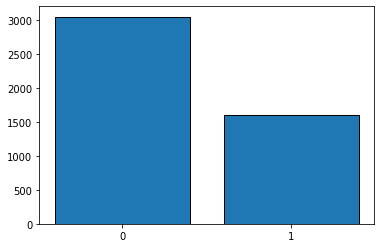

Greater number of all employees are not leaving the company in the next 2 years.


In [368]:
# Distribution of employees per `LeaveOrNot`

labels, counts = np.unique(
	employees['LeaveOrNot'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

leaveOrNot = labels[np.argmax(counts)]

print(f'Greater number of all employees are {"not" if leaveOrNot == 0 else ""} leaving the company in the next 2 years.')

## Model

In [369]:
# `LeaveOrNot` data
leaveOrNot_Data = normalizedEmployees.drop('LeaveOrNot', axis=1).to_numpy()
leaveOrNot_Data

array([[2017,    3,   34, ...,    0,    1,    0],
       [2013,    1,   28, ...,    1,    0,    0],
       [2014,    3,   38, ...,    0,    0,    0],
       ...,
       [2018,    3,   27, ...,    0,    1,    0],
       [2012,    3,   30, ...,    0,    1,    1],
       [2015,    3,   33, ...,    0,    1,    1]], dtype=int16)

In [370]:
# Labels collection

labels_Data = normalizedEmployees.loc[:, 'LeaveOrNot'].to_numpy()
labels_Data

array([0, 1, 0, ..., 1, 0, 0], dtype=int8)

In [371]:
# Division into train and test data

X_train, X_test, y_train, y_test = train_test_split(leaveOrNot_Data, labels_Data, test_size=0.2, random_state=12345)

In [396]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # Train model
    classifier.fit(feature_vector_train, label)
    
    # Generate models' predictions for test data
    predictions = classifier.predict(feature_vector_valid)
    
    # Evaluate the model basing on test data
    scores = list(metrics.precision_recall_fscore_support(y_test, predictions, average='weighted', labels=np.unique(predictions)))

    score_vals = [
        scores[0],
        scores[1],
        scores[2]
    ]
    score_vals.append(metrics.accuracy_score(predictions,y_test))
    return score_vals


In [397]:
# MODEL 1 - Logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.7397611354648791, 0.748657357679914, 0.7312207127954653, 0.748657357679914]


In [398]:
# MODEL 2 - Support Vector Machine
svc = svm.SVC()

accuracy = train_model(svc, X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.6680988184747583, 1.0, 0.8010302640051513, 0.6680988184747583]


In [399]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8373937888648721, 0.8399570354457573, 0.8368241481951316, 0.8399570354457573]


<AxesSubplot:>

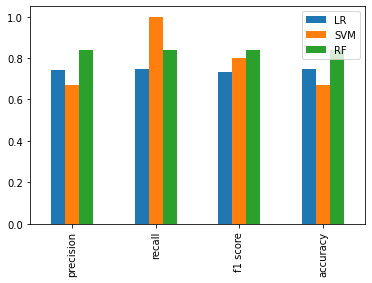

In [400]:
compareModels = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
compareModels.plot(kind='bar')

In [401]:
# Corrective action - use of a neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.6680988184747583, 1.0, 0.8010302640051513, 0.6680988184747583]


<AxesSubplot:>

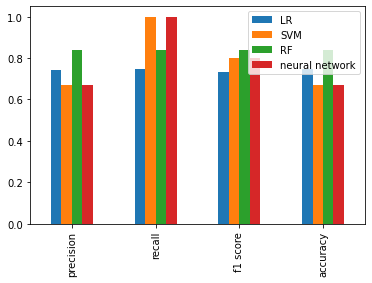

In [402]:
compareModels = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
compareModels.plot(kind='bar')

In [403]:
# Corrective action - Hyperparameters

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.8197587297381277, 0.8227712137486574, 0.8174308235377575, 0.8227712137486574]
SVM kernel='sigmoid' [0.6680988184747583, 1.0, 0.8010302640051513, 0.6680988184747583]
SVM degree=4 [0.6680988184747583, 1.0, 0.8010302640051513, 0.6680988184747583]


<AxesSubplot:>

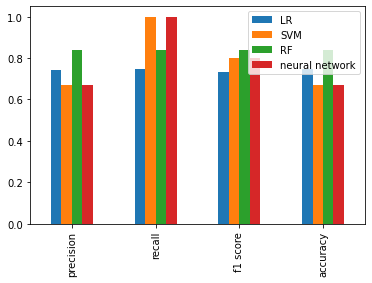

In [404]:
compareModels = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
compareModels.plot(kind='bar')